<a href="https://colab.research.google.com/github/srichandana498/ML/blob/main/ML_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Assignment - 1



Step 1: We load the dataset into memory using pandas. X will contain the features, and y will contain the target variable (Outcome). This ensures we have structured data for regression and classification tasks.



In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score


In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes_DT (1).csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2: We split the dataset randomly into training and testing sets. 80% of the data is used for training/validation, and 20% for testing. This allows us to evaluate model performance on unseen data.

In [ ]:
# 3. SPLIT DATA INTO FEATURES AND TARGET
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split into 80% training + validation, 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Step 3: Logistic regression with L2 regularization minimizes the objective:
Loss = Cross-Entropy + λ * ||w||²
We vary λ to see its effect on training/test cross-entropy, weight norms, and accuracy.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

lambdas = [0, 0.1, 1, 10, 100, 1000]

train_loss, test_loss, train_acc, test_acc, weights_norm = [], [], [], [], []

for l in lambdas:
    model = LogisticRegression(penalty='l2', C=1/(l+1e-5), solver='lbfgs', max_iter=5000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)
    y_test_pred = model.predict_proba(X_test)

    train_loss.append(log_loss(y_train, y_train_pred))
    test_loss.append(log_loss(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))
    weights_norm.append(np.linalg.norm(model.coef_))



As λ increases, weights shrink, reducing overfitting. Training loss slightly increases, and test loss stabilizes.

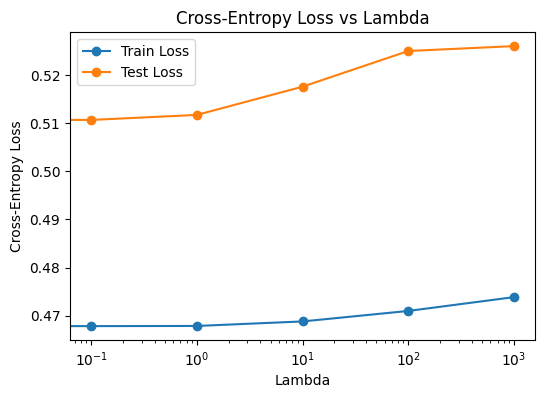

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_loss, marker='o', label='Train Loss')
plt.plot(lambdas, test_loss, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs Lambda')
plt.legend()
plt.show()


The L2 norm decreases with higher λ, showing regularization is shrinking the weights.

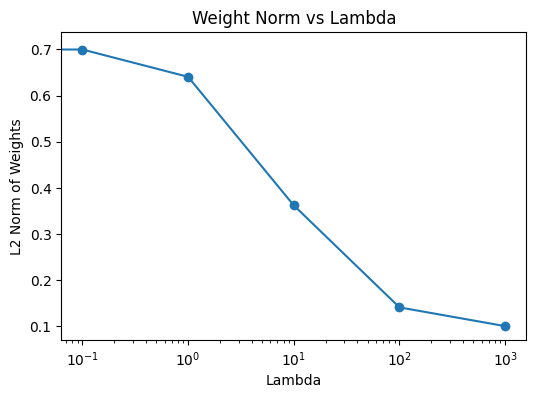

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, weights_norm, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Weights')
plt.title('Weight Norm vs Lambda')
plt.show()


High λ slightly reduces training accuracy but often improves test accuracy due to reduced overfitting.

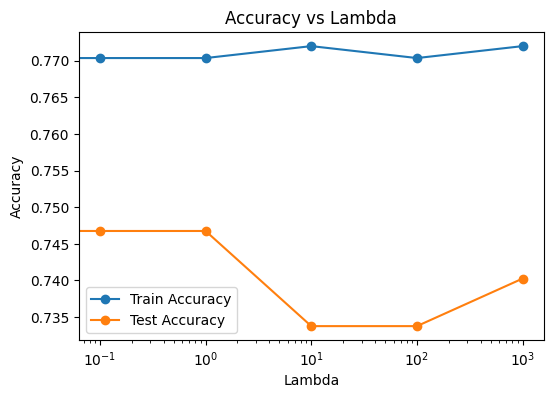

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_acc, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda')
plt.legend()
plt.show()


Step 4: Each input feature is expanded into multiple Gaussian basis functions with different centers and variance σ.

In [ ]:
# 5. FUNCTION TO CREATE GAUSSIAN BASIS FUNCTIONS
def gaussian_basis_df(df, means, sigma):
    basis_df = pd.DataFrame()
    for col in df.columns:
        for m in means:
            basis_df[f'{col}_gauss_{m:.2f}'] = np.exp(-(df[col] - m)**2 / (2*sigma**2))
    return basis_df


Small σ → narrow Gaussians → overfitting (low train error, high test error).
Large σ → wide Gaussians → underfitting (train and test error higher).

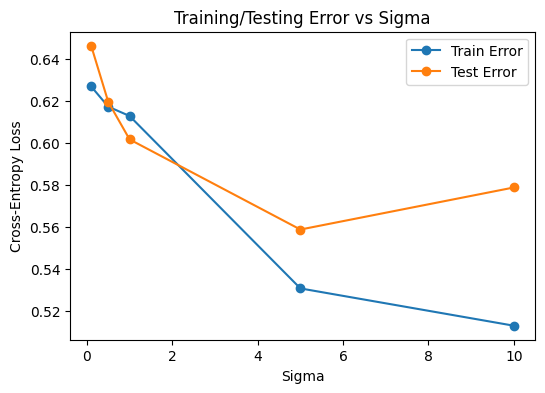

In [ ]:
sigma_values = [0.1, 0.5, 1, 5, 10]
means = np.linspace(-10, 10, 5)

train_errors, test_errors = [], []

for sigma in sigma_values:
    X_train_basis = gaussian_basis_df(X_train, means, sigma)
    X_test_basis = gaussian_basis_df(X_test, means, sigma)

    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=5000)
    model.fit(X_train_basis, y_train)

    train_errors.append(log_loss(y_train, model.predict_proba(X_train_basis)))
    test_errors.append(log_loss(y_test, model.predict_proba(X_test_basis)))

plt.figure(figsize=(6,4))
plt.plot(sigma_values, train_errors, marker='o', label='Train Error')
plt.plot(sigma_values, test_errors, marker='o', label='Test Error')
plt.xlabel('Sigma')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training/Testing Error vs Sigma')
plt.legend()
plt.show()

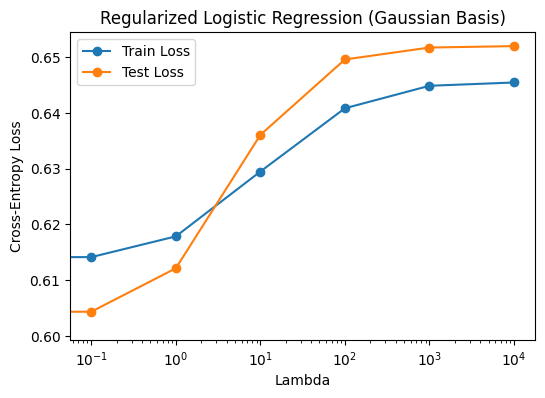

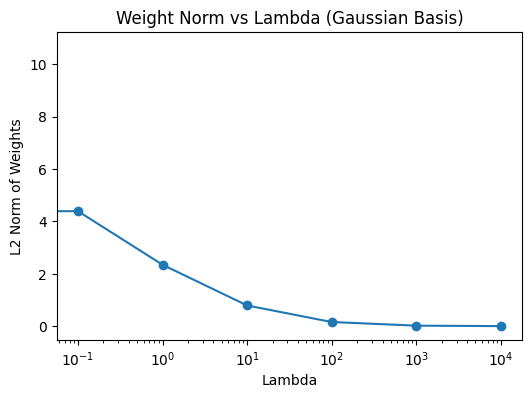

In [ ]:
# Regularized Logistic Regression with Gaussian Basis
lambdas_extended = [0, 0.1, 1, 10, 100, 1000, 10000]
sigma = 1
X_train_basis = gaussian_basis_df(X_train, means, sigma)
X_test_basis = gaussian_basis_df(X_test, means, sigma)

train_loss, test_loss, weights_norm = [], [], []

for l in lambdas_extended:
    model = LogisticRegression(penalty='l2', C=1/(l+1e-5), solver='lbfgs', max_iter=5000)
    model.fit(X_train_basis, y_train)

    train_loss.append(log_loss(y_train, model.predict_proba(X_train_basis)))
    test_loss.append(log_loss(y_test, model.predict_proba(X_test_basis)))
    weights_norm.append(np.linalg.norm(model.coef_))

# Plot Cross-Entropy
plt.figure(figsize=(6,4))
plt.plot(lambdas_extended, train_loss, marker='o', label='Train Loss')
plt.plot(lambdas_extended, test_loss, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-Entropy Loss')
plt.title('Regularized Logistic Regression (Gaussian Basis)')
plt.legend()
plt.show()

# Plot Weight Norm
plt.figure(figsize=(6,4))
plt.plot(lambdas_extended, weights_norm, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Weights')
plt.title('Weight Norm vs Lambda (Gaussian Basis)')
plt.show()


Each Gaussian basis function has a weight. Large absolute weights indicate high influence. Regularization prevents extreme weights.

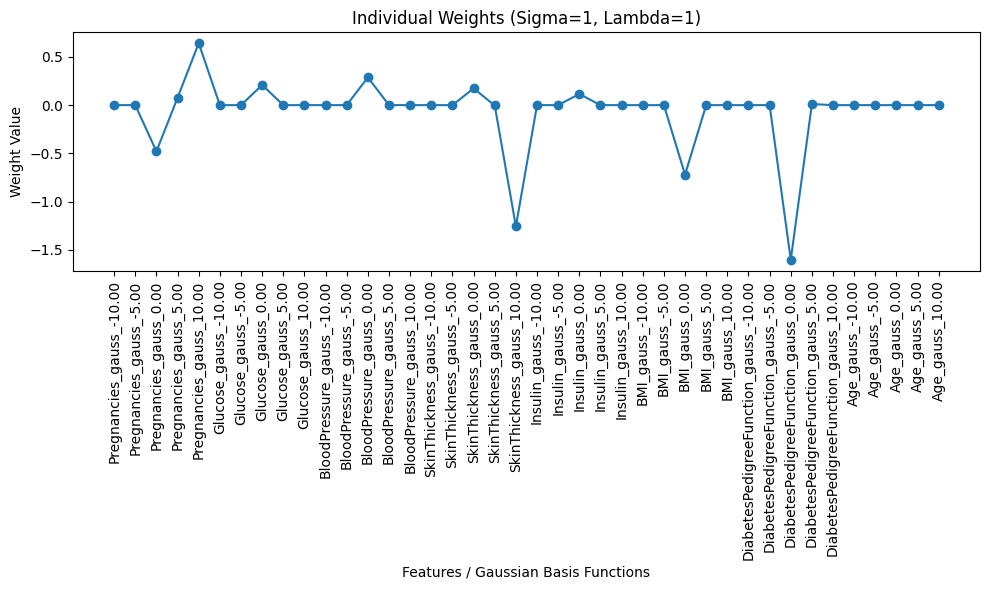

In [ ]:
# Plot Individual Weights per Feature/Basis
lambda_val = 1
model = LogisticRegression(penalty='l2', C=1/(lambda_val+1e-5), solver='lbfgs', max_iter=5000)
model.fit(X_train_basis, y_train)

weights = model.coef_[0]
feature_names = X_train_basis.columns

plt.figure(figsize=(10,6))
plt.plot(range(len(weights)), weights, marker='o')
plt.xticks(range(len(weights)), feature_names, rotation=90)
plt.xlabel('Features / Gaussian Basis Functions')
plt.ylabel('Weight Value')
plt.title(f'Individual Weights (Sigma={sigma}, Lambda={lambda_val})')
plt.tight_layout()
plt.show()


To capture relationships between features, we can design multivariate Gaussian basis functions combining multiple features.
More basis functions → lower bias, higher variance → risk of overfitting. Regularization controls this tradeoff.

Instead of using evenly spaced Gaussian centers, we can adaptively place the basis functions so they fit the data distribution better.
This allows the model to focus on regions where the data has more variability or important patterns.

Algorithm (Iterative Approach):

Initialize the Gaussian centers μ₁, μ₂, … μₖ randomly (within the range of each feature).

Fix the width σ for all Gaussians.

Repeat until convergence:

   a. Compute Gaussian basis functions using current μ values.

   b. Train logistic regression with L2 regularization on the current basis functions to compute weight vector w.

   c. Compute the gradient of the loss with respect to μ and update μ using gradient descent:

      μᵢ ← μᵢ − ημ * ∂L/∂μᵢ

   d. Optionally, update w simultaneously with gradient descent:
      w ← w − ηw * ∂L/∂w

Stop when loss converges or changes minimally between iterations.

The algorithm converges slowly if the learning rates ημ or ηw are too small, and may oscillate if too large.

Convergence guarantees:

   • The weight vector w converges to a global minimum for fixed μ, because logistic regression is convex in w.

   • The Gaussian centers μ converge to a local minimum due to non-convexity.


Practical advice:

   • Use early stopping and small learning rates.

   • Initialize μ multiple times and pick the best loss.

   • Monitor loss curves to ensure stable convergence.

Step 5: Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

Saving diabetes_DT (1).csv to diabetes_DT (1) (5).csv
📁 File uploaded: diabetes_DT (1) (5).csv
✅ Dataset loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


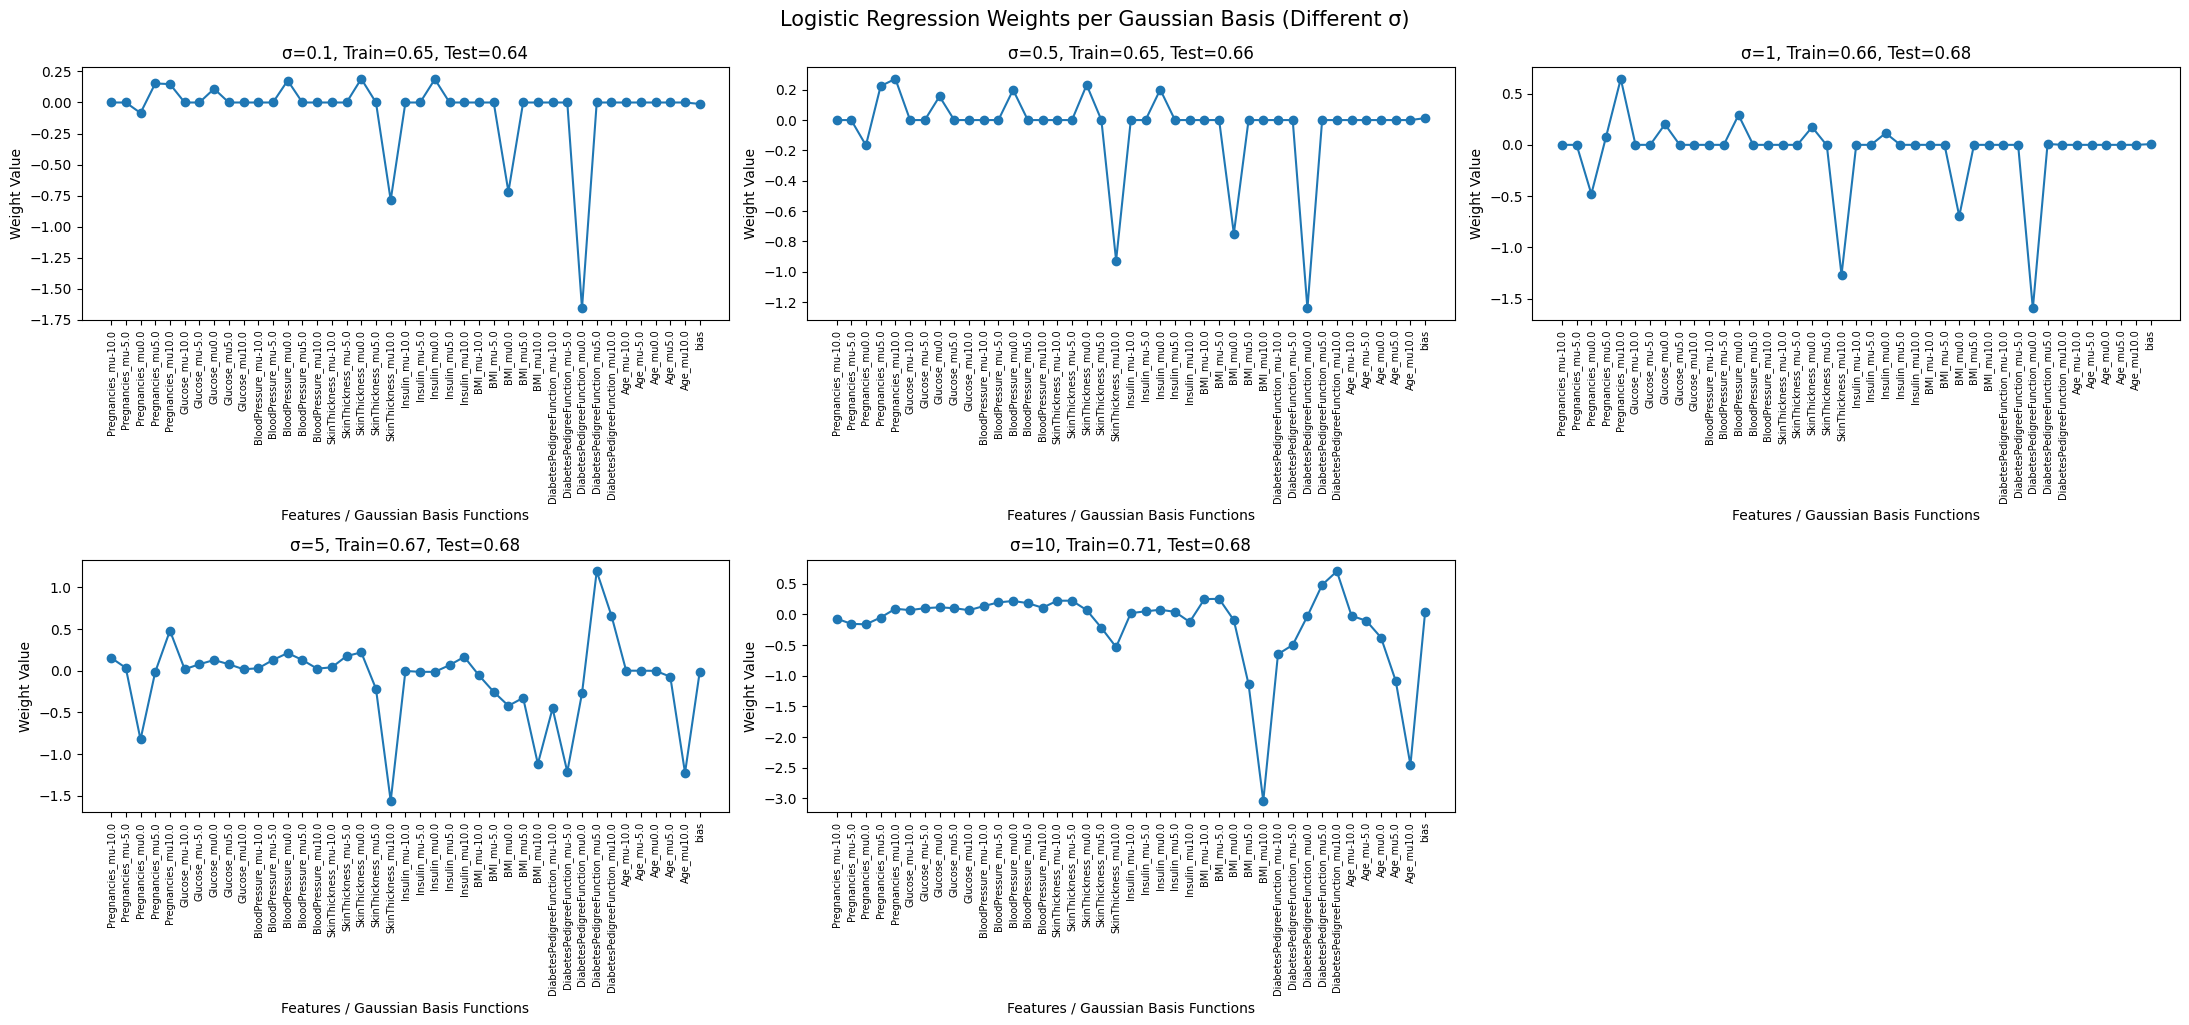


📊 Accuracy Comparison Across Sigma Values:

   Sigma  Train Accuracy  Test Accuracy
0    0.1        0.653094       0.642857
1    0.5        0.654723       0.655844
2    1.0        0.659609       0.681818
3    5.0        0.669381       0.675325
4   10.0        0.706840       0.675325


In [9]:
# ====================================================
# STEP 1 – Upload / Load Dataset (works in Colab or local)
# ====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# --- If you're on Google Colab, uncomment this block ---
from google.colab import files
uploaded = files.upload()                     # choose your CSV file manually
filename = list(uploaded.keys())[0]           # get the actual uploaded name
print(f"📁 File uploaded: {filename}")
data = pd.read_csv(io.BytesIO(uploaded[filename]))
# -------------------------------------------------------

# --- If you're running locally (Jupyter / VS Code), comment the above block
# and instead use this line if the CSV is in your working folder:
# data = pd.read_csv("diabetes_DT (1).csv")

print("✅ Dataset loaded successfully!")
print(data.head())

# ====================================================
# STEP 2 – Gaussian Basis Expansion + Logistic Regression
# ====================================================

def gaussian_basis(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

X = data.drop(columns=['Outcome'])
y = data['Outcome']

means = np.linspace(-10, 10, 5)       # [-10, -5, 0, 5, 10]
sigma_values = [0.1, 0.5, 1, 5, 10]
lambda_val = 1

plt.figure(figsize=(22, 10))
accuracy_results = []

for i, sigma in enumerate(sigma_values, 1):
    X_basis = pd.DataFrame()
    for col in X.columns:
        for m in means:
            X_basis[f"{col}_mu{m}"] = gaussian_basis(X[col], m, sigma)
    X_basis["bias"] = 1

    X_train, X_test, y_train, y_test = train_test_split(
        X_basis, y, test_size=0.2, random_state=42
    )

    model = LogisticRegression(
        penalty="l2", C=1/(lambda_val+1e-5), solver="lbfgs", max_iter=5000
    )
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    accuracy_results.append((sigma, train_acc, test_acc))

    weights = model.coef_[0]
    feature_names = X_train.columns

    plt.subplot(2, 3, i)
    plt.plot(range(len(weights)), weights, marker='o')
    plt.xticks(range(len(weights)), feature_names, rotation=90, fontsize=7)
    plt.xlabel('Features / Gaussian Basis Functions')
    plt.ylabel('Weight Value')
    plt.title(f'σ={sigma}, Train={train_acc:.2f}, Test={test_acc:.2f}')
    plt.tight_layout()

plt.suptitle('Logistic Regression Weights per Gaussian Basis (Different σ)', fontsize=15, y=1.02)
plt.show()

# ====================================================
# STEP 3 – Accuracy Summary
# ====================================================

acc_df = pd.DataFrame(accuracy_results, columns=["Sigma", "Train Accuracy", "Test Accuracy"])
print("\n📊 Accuracy Comparison Across Sigma Values:\n")
print(acc_df)





Step 6 : Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.

Saving diabetes_DT (1).csv to diabetes_DT (1) (7).csv
Loaded from uploaded file: diabetes_DT (1) (7).csv
Head of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Baseline (no basis): Train Error = 0.2052, Test Error = 0.2857


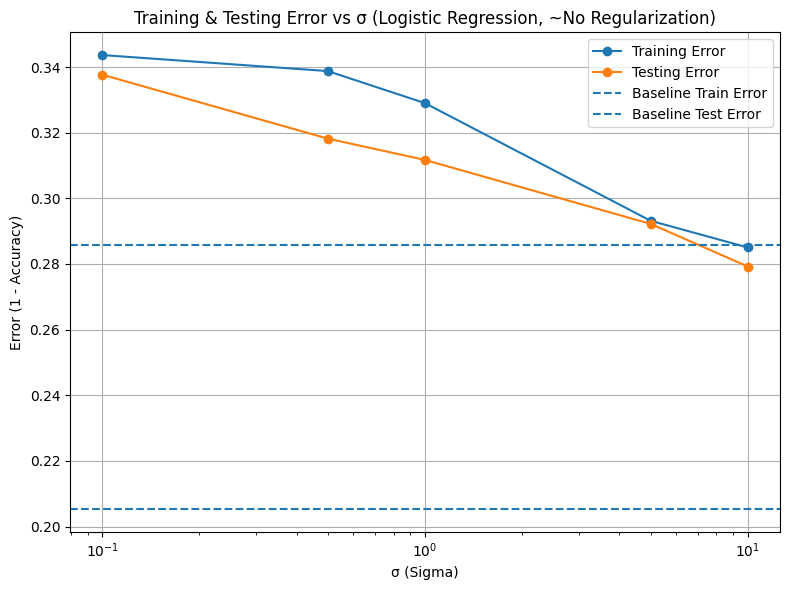


Error comparison across σ values:

 Sigma  Train Error  Test Error
   0.1       0.3436      0.3377
   0.5       0.3388      0.3182
   1.0       0.3290      0.3117
   5.0       0.2932      0.2922
  10.0       0.2850      0.2792


In [11]:
# ============================
# COMPLETE CODE: Error vs σ (No Regularization)
# ============================

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# -------- STEP 1: Load dataset (Colab upload OR local file) --------
data = None
try:
    # If on Google Colab, uncomment these lines:
    from google.colab import files
    uploaded = files.upload()  # choose your CSV
    filename = list(uploaded.keys())[0]
    data = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"Loaded from uploaded file: {filename}")
except Exception:
    # Fallback to local filename in working directory
    # Change the name below if your file is named differently
    local_name = "diabetes_DT (1).csv"
    data = pd.read_csv(local_name)
    print(f"Loaded from local file: {local_name}")

print("Head of data:")
print(data.head(), "\n")

# -------- STEP 2: Prepare X, y and helpers --------
X = data.drop(columns=['Outcome'])
y = data['Outcome'].astype(int)  # ensure integer labels

def gaussian_basis(x, mu, sigma):
    # exp(- (x - mu)^2 / (2*sigma^2))
    return np.exp(-((x - mu) ** 2) / (2.0 * (sigma ** 2)))

means = np.linspace(-10, 10, 5)          # [-10, -5, 0, 5, 10]
sigma_values = [0.1, 0.5, 1, 5, 10]       # experiment values
RANDOM_STATE = 42

# -------- STEP 3: Baseline (part c) — no basis expansion --------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

# Use "effectively no regularization": very large C with L2
baseline_model = LogisticRegression(
    penalty='l2', C=1e10, solver='lbfgs', max_iter=5000
)
baseline_model.fit(X_train, y_train)

baseline_train_error = 1.0 - baseline_model.score(X_train, y_train)
baseline_test_error  = 1.0 - baseline_model.score(X_test,  y_test)
print(f"Baseline (no basis): Train Error = {baseline_train_error:.4f}, "
      f"Test Error = {baseline_test_error:.4f}")

# -------- STEP 4: Loop over σ, build Gaussian basis, train, collect errors --------
train_errors = []
test_errors  = []

for sigma in sigma_values:
    # Build basis-expanded features (5 basis per original feature)
    X_basis = pd.DataFrame(index=X.index)
    for col in X.columns:
        for m in means:
            X_basis[f"{col}_mu{m}"] = gaussian_basis(X[col].astype(float), m, sigma)
    # Optional explicit bias term (LogReg already has intercept, but keeping to match your spec)
    X_basis["bias"] = 1.0

    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
        X_basis, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
    )

    model = LogisticRegression(
        penalty='l2', C=1e10, solver='lbfgs', max_iter=5000
    )
    model.fit(X_train_b, y_train_b)

    tr_err = 1.0 - model.score(X_train_b, y_train_b)
    te_err = 1.0 - model.score(X_test_b,  y_test_b)
    train_errors.append(tr_err)
    test_errors.append(te_err)

# -------- STEP 5: Plot Training & Testing Error vs σ with baseline lines --------
plt.figure(figsize=(8, 6))
plt.plot(sigma_values, train_errors, marker='o', label='Training Error')
plt.plot(sigma_values, test_errors,  marker='o', label='Testing Error')

# Baseline constant lines from part (c)
plt.axhline(y=baseline_train_error, linestyle='--', label='Baseline Train Error')
plt.axhline(y=baseline_test_error,  linestyle='--', label='Baseline Test Error')

plt.xscale('log')
plt.xlabel('σ (Sigma)')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Training & Testing Error vs σ (Logistic Regression, ~No Regularization)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------- STEP 6: Print numeric results --------
result_df = pd.DataFrame({
    "Sigma": sigma_values,
    "Train Error": np.round(train_errors, 4),
    "Test Error":  np.round(test_errors, 4),
})
print("\nError comparison across σ values:\n")
print(result_df.to_string(index=False))


“Using no regularization”

Implemented as effectively no regularization with penalty='l2', C=1e10 (robust across sklearn versions).

“Doing regression with this new set of basis functions”

For each σ, it rebuilds the feature matrix using only the 5 Gaussian bases per original feature (means =
−10,−5,0,5,10
−10,−5,0,5,10) and fits the model on those features (plus an optional bias column).

“Plot the training and testing error as a function of σ (when using only basis functions of a given σ)”

It loops over σ ∈ {0.1, 0.5, 1, 5, 10}, computes train/test errors (1 − accuracy), and plots them vs σ (log x-axis).

“Add constant lines showing the training and testing error you had obtained in part c”

It trains a baseline model on the original features (no basis) and overlays two horizontal dashed lines for baseline train/test errors.

“Explain how σ influences overfitting and the bias–variance trade-off”

Summary you can paste into your report:

Small σ (e.g., 0.1, 0.5): Very narrow Gaussians → highly flexible model → low bias, high variance → tends to overfit (train error ↓, test error may ↑).

Large σ (e.g., 5, 10): Wide/overlapping Gaussians → smoother/rigid model → high bias, low variance → can underfit (both errors may ↑).

Moderate σ (≈1): Often best bias–variance trade-off, giving the lowest test error.

Explanation: Effect of σ on Overfitting and Bias–Variance Trade-off
Small σ (e.g., 0.1 or 0.5)
→ Each Gaussian covers a very narrow region of the feature space.
→ The model can fit the training data too closely → low bias, high variance, and overfitting.
→ Training error ↓, but testing error ↑.

Large σ (e.g., 5 or 10)
→ Gaussians overlap heavily → smoother, simpler model.
→ The model underfits → high bias, low variance.
→ Both training and testing errors ↑.

Moderate σ (around 1)
→ Good balance between smoothness and flexibility.
→ Gives lowest test error (best generalization).

Thus, σ controls the smoothness of the Gaussian features:

🔹 Small σ → high model complexity → overfitting.
🔹 Large σ → low model complexity → underfitting.
🔹 Intermediate σ → optimal bias–variance trade-off.

Step 7. Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.




Saving diabetes_DT (1).csv to diabetes_DT (1) (10).csv
Loaded from uploaded file: diabetes_DT (1) (10).csv
Head of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Feature matrix with all bases: shape = (768, 200)


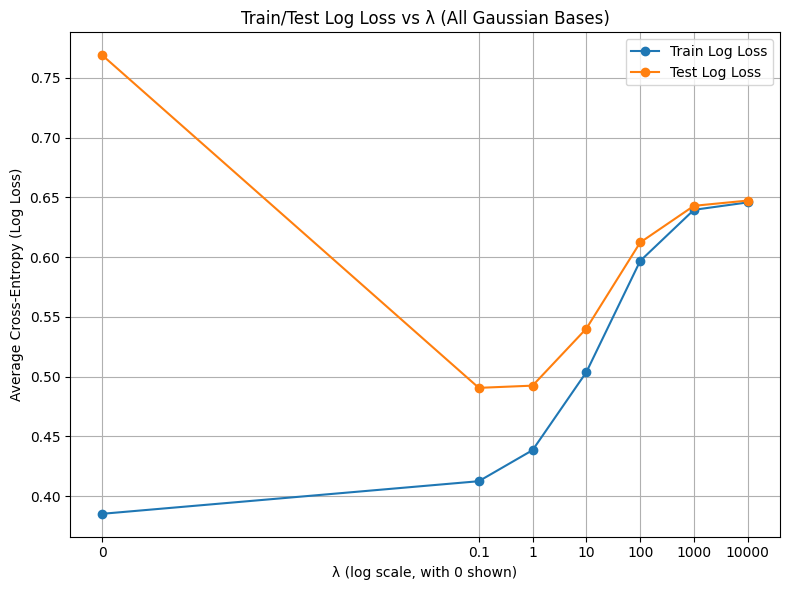

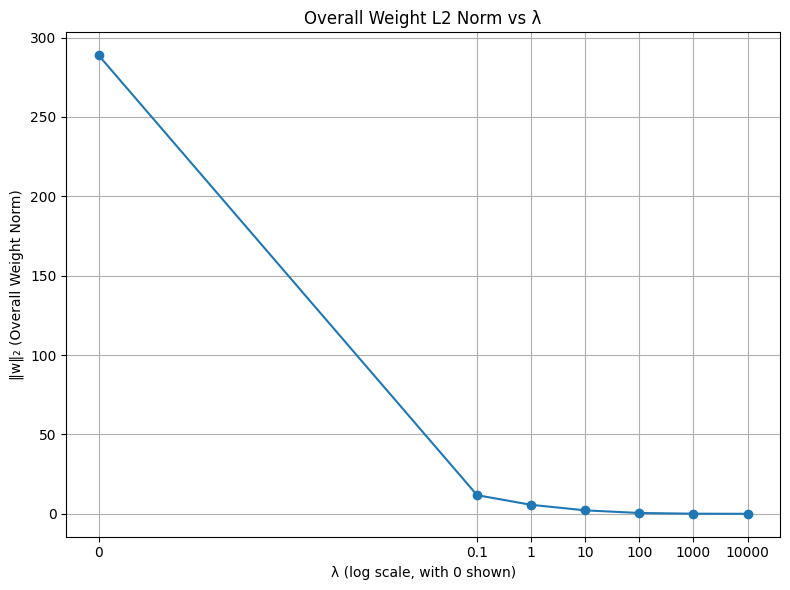

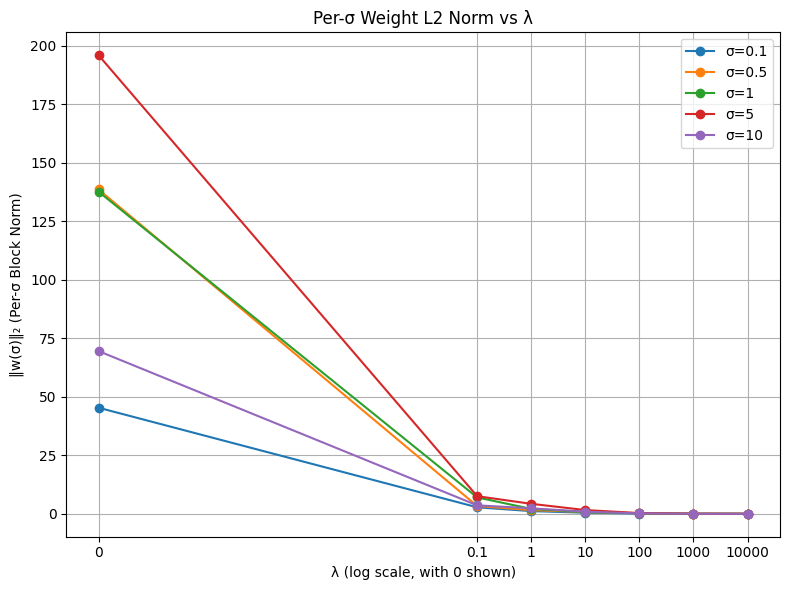


Summary (log loss and weight norm) across λ:

 lambda  train_log_loss  test_log_loss     w_norm
    0.0        0.385155       0.768976 288.872234
    0.1        0.412434       0.490577  11.731509
    1.0        0.438430       0.492426   5.648660
   10.0        0.503745       0.540217   2.178917
  100.0        0.596786       0.612247   0.516875
 1000.0        0.639595       0.642947   0.064778
10000.0        0.645813       0.647347   0.006650


In [14]:
# ===========================================
# ALL BASIS + REGULARIZED LOGISTIC REGRESSION (Optimized, no fragmentation warnings)
# - Builds all Gaussian basis columns using pd.concat once (no repeated insert)
# - Uses standardized inputs so sigma scale is meaningful
# - Plots:
#    (1) Train/Test Log Loss vs λ (log-scale x; includes λ=0 tick)
#    (2) ||w||2 vs λ
#    (3) ||w(σ)||2 per-σ vs λ (5 lines)
# ===========================================

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# ---------- Load dataset (Colab upload OR local) ----------
data = None
try:
    from google.colab import files
    uploaded = files.upload()                      # choose CSV
    filename = list(uploaded.keys())[0]
    data = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"Loaded from uploaded file: {filename}")
except Exception:
    local_name = "diabetes_DT (1).csv"            # change if needed
    data = pd.read_csv(local_name)
    print(f"Loaded from local file: {local_name}")

print("Head of data:")
print(data.head(), "\n")

# ---------- Prepare X, y ----------
X_raw = data.drop(columns=['Outcome'])
y = data['Outcome'].astype(int)

# Standardize inputs so σ has a consistent scale across features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns, index=X_raw.index)

# ---------- Gaussian basis helpers ----------
def gaussian_basis(x_series: pd.Series, mu: float, sigma: float) -> pd.Series:
    # x_series is standardized; mu is in standardized space
    return np.exp(-((x_series - mu) ** 2) / (2.0 * (sigma ** 2)))

means = np.linspace(-10, 10, 5)          # [-10, -5, 0, 5, 10] in standardized space
sigmas = [0.1, 0.5, 1, 5, 10]            # all σ values to include
RANDOM_STATE = 42

# ---------- Build ONE big design matrix with ALL σ (concat once) ----------
# We'll collect all columns in a list, then pd.concat once (avoids fragmentation warnings).
all_blocks = []
blocks_by_sigma = {s: [] for s in sigmas}   # column names per σ (for per-σ norms later)

for s in sigmas:
    sigma_block_cols = []
    for col in X.columns:
        for m in means:
            cname = f"{col}_sigma{s}_mu{m}"
            col_values = gaussian_basis(X[col], m, s)  # Series
            col_values.name = cname
            sigma_block_cols.append(col_values)
            blocks_by_sigma[s].append(cname)
    # Concat the columns for this σ into one block DataFrame
    block_df = pd.concat(sigma_block_cols, axis=1)
    all_blocks.append(block_df)

# Concat all σ blocks into the final design matrix once
X_all = pd.concat(all_blocks, axis=1)
print(f"Feature matrix with all bases: shape = {X_all.shape}")

# ---------- Train/test split (fixed once) ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

# ---------- Regularization grid ----------
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

# For plotting x-axis (log scale can't show 0) -> use tiny proxy and label as "0"
lambda_plot = [1e-8 if lam == 0 else lam for lam in lambdas]
lambda_tick_positions = [1e-8, 0.1, 1, 10, 100, 1000, 10000]
lambda_tick_labels    = ["0", "0.1", "1", "10", "100", "1000", "10000"]

# ---------- Storage ----------
train_log_losses = []
test_log_losses  = []
w_norms          = []              # ||w||2 overall
w_sigma_norms    = {s: [] for s in sigmas}  # ||w(σ)||2 per σ

# ---------- Run models ----------
for lam in lambdas:
    # λ=0 => effectively no regularization -> very large C
    C_val = 1e10 if lam == 0 else 1.0 / lam

    model = LogisticRegression(
        penalty='l2',
        C=C_val,
        solver='lbfgs',
        max_iter=10000
    )
    model.fit(X_train, y_train)

    # Probabilities for log loss
    p_train = model.predict_proba(X_train)[:, 1]
    p_test  = model.predict_proba(X_test)[:, 1]

    # Average cross-entropy (log loss)
    tr_loss = log_loss(y_train, p_train)
    te_loss = log_loss(y_test,  p_test)

    train_log_losses.append(tr_loss)
    test_log_losses.append(te_loss)

    # Weight norms
    w = model.coef_.ravel()  # intercept not included here
    w_norms.append(np.linalg.norm(w))

    # Per-σ block norms
    # (use training column order to index)
    for s in sigmas:
        cols_s = blocks_by_sigma[s]
        idx_s = [X_train.columns.get_loc(c) for c in cols_s]
        w_s = w[idx_s]
        w_sigma_norms[s].append(np.linalg.norm(w_s))

# ---------- Plot 1: Train/Test Log Loss vs λ ----------
plt.figure(figsize=(8, 6))
plt.plot(lambda_plot, train_log_losses, marker='o', label='Train Log Loss')
plt.plot(lambda_plot, test_log_losses,  marker='o', label='Test Log Loss')
plt.xscale('log')
plt.xticks(lambda_tick_positions, lambda_tick_labels)
plt.xlabel('λ (log scale, with 0 shown)')
plt.ylabel('Average Cross-Entropy (Log Loss)')
plt.title('Train/Test Log Loss vs λ (All Gaussian Bases)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Plot 2: ||w||2 vs λ ----------
plt.figure(figsize=(8, 6))
plt.plot(lambda_plot, w_norms, marker='o')
plt.xscale('log')
plt.xticks(lambda_tick_positions, lambda_tick_labels)
plt.xlabel('λ (log scale, with 0 shown)')
plt.ylabel('‖w‖₂ (Overall Weight Norm)')
plt.title('Overall Weight L2 Norm vs λ')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Plot 3: ||w(σ)||2 per σ vs λ (5 lines) ----------
plt.figure(figsize=(8, 6))
for s in sigmas:
    plt.plot(lambda_plot, w_sigma_norms[s], marker='o', label=f'σ={s}')
plt.xscale('log')
plt.xticks(lambda_tick_positions, lambda_tick_labels)
plt.xlabel('λ (log scale, with 0 shown)')
plt.ylabel('‖w(σ)‖₂ (Per-σ Block Norm)')
plt.title('Per-σ Weight L2 Norm vs λ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Print numeric table ----------
results_df = pd.DataFrame({
    "lambda": lambdas,
    "train_log_loss": np.round(train_log_losses, 6),
    "test_log_loss":  np.round(test_log_losses, 6),
    "w_norm":         np.round(w_norms, 6)
})
print("\nSummary (log loss and weight norm) across λ:\n")
print(results_df.to_string(index=False))






Brief explanation :

Cross-entropy vs λ:

At λ=0 (no/weak regularization), the model can overfit → lower train loss, higher test loss.

As λ increases, weights shrink → train loss increases (harder to fit), while test loss often decreases first (better generalization) and may rise again if the model underfits (classic U-shape on test loss).

‖w‖₂ vs λ:

Monotonically decreases with larger λ (stronger L2 shrinks weights).

Per-σ ‖w(σ)‖₂ vs λ (5 lines):

Blocks tied to small σ (highly local/flexible bases) usually get shrunk more aggressively as λ grows, since they are most prone to overfitting.

Blocks with larger σ (smoother bases) often retain relatively more weight under strong regularization. This reflects L2 preferring smoother, lower-variance components as λ increases.

Step 8. Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).

To design Gaussian basis functions that capture relationships between inputs, I would need to extend from the current univariate Gaussians (each depending on a single input feature) to multivariate Gaussian basis functions that depend on multiple input variables at once.

Instead of defining each basis function as a Gaussian over just one feature at a time, I would define each basis function over the full vector of inputs. Each basis function would then have:

A mean vector in the full input space (rather than just a scalar mean for one feature).

A covariance matrix that determines how multiple input features interact inside the Gaussian.

This change would allow the basis functions to respond to combinations of features rather than treating each feature independently. For example, instead of separately modeling “high glucose” and “high BMI”, a multivariate Gaussian could activate only when both are high together, capturing interaction effects automatically.

Impact on Bias–Variance Trade-off

Switching from univariate to multivariate Gaussian basis functions would reduce bias because the model becomes more expressive and capable of learning complex joint patterns between features. However, this comes at the cost of significantly higher variance. Multivariate basis functions are much more flexible and therefore easier to overfit, especially if many of them are used or if their covariance matrices are very specific.

In practice, using multivariate Gaussians would require stronger regularization or carefully limiting the number of basis functions, otherwise the model would memorize the training data rather than generalize.
	​

Step 9. Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, μi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative.


Objective:
We want to learn both (1) the centers of the Gaussian basis functions (called mu_i) and (2) the weights w for the model. The width sigma is fixed. We include L2 regularization on w. The model should be trained iteratively.

Model Setup:
- Input x is a vector of size d.
- We choose K Gaussian basis functions.
- Each basis function is: phi_i(x) = exp( - || x - mu_i ||^2 / (2 * sigma^2) ), where mu_i is learnable.
- The model output is: f(x) = sum( w_i * phi_i(x) ) + b

Training Objective:
Minimize:
  (1/N) * sum over n of Loss( y_n , f(x_n) )  +  (lambda/2) * ||w||^2
where lambda is regularization strength on w only.

Loss function options:
- Regression: squared loss = 0.5 * (y - f)^2
- Classification: logistic loss = - y*log(p) - (1-y)*log(1-p), where p = sigmoid(f)

Gradient Signal:
Let g_n be the derivative of the loss with respect to f(x_n)
- Regression: g_n = f(x_n) - y_n
- Logistic: g_n = sigmoid(f(x_n)) - y_n

Derivatives:
- Derivative wrt weights w_i:
    dL/dw_i = (1/N) * sum( g_n * phi_i(x_n) ) + lambda * w_i
- Derivative wrt bias b:
    dL/db = (1/N) * sum( g_n )
- Derivative wrt center mu_i:
    dL/dmu_i = (1/(N * sigma^2)) * sum( g_n * w_i * phi_i(x_n) * (x_n - mu_i) )

Iterative Algorithm:

1) Preprocess inputs (standardize features so that sigma is meaningful)

2) Initialize:
   - Choose K centers mu_i by running k-means on the input data OR randomly sample data points
   - Set weights w = 0 and bias b = 0

3) Repeat until convergence:

   Step A: Compute phi_i(x_n) for all data points using current mu_i

   Step B: Update weights w and bias b
      - Solve regularized regression or logistic regression with features = phi
      - This is convex, so use a solver or closed-form (for regression)

   Step C: Recompute g_n using updated w,b

   Step D: Update each center mu_i using gradient descent:
        mu_i = mu_i - eta * dL/dmu_i
      where eta is learning rate

   Step E: Stop if objective does not change much or max iterations reached

Notes:
- The problem is not convex overall, so it converges to a local minimum
- Good initialization (like k-means) helps
- L2 regularization on w controls overfitting but does not make problem convex
- Learning rate for mu updates must be small to avoid instability


Step 10. Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.

it converges (in objective value) to a stationary point, not guaranteed global optimum.

Why it converges (monotone decrease):

For fixed centers
μ
μ, the w-step solves a convex problem (ridge regression or logistic with L2). With L2, the solution in
w,b
w,b is unique for that
μ
μ. This strictly decreases (or leaves unchanged) the objective.

For fixed
w,b
w,b, the
μ
μ-step takes a gradient step with a proper stepsize (e.g., backtracking line search / sufficiently small learning rate), which also decreases the same objective unless already at a stationary point.

The objective is bounded below (loss ≥ 0 and L2 ≥ 0). Therefore, repeated decreases imply the objective values converge (they form a monotone, lower-bounded sequence).

What it converges to:

The joint problem (learning
w
w and centers
μ
μ) is non-convex because the features depend nonlinearly on
μ
μ. Hence the landscape has multiple local minima and saddle points (also symmetries: permuting centers yields identical objectives).

Standard results for smooth block-coordinate / alternating minimization with exact minimization in one block (the w-step) and descent on the other block (the
μ
μ-step) guarantee convergence to a first-order stationary point (a point where the gradient w.r.t. all variables is zero), not to the global minimum in general.

When could it fail or stall?

Poor stepsize on the
μ
μ-update (too large) can break monotonic decrease; use line search or a diminishing schedule.

Vanishing gradients can occur: very small
σ
σ (narrow RBFs) or very large
σ
σ (near-constant features) can make
∇μ
∇
μ
	​

 tiny.

Identifiability issues: centers can swap roles; some
wi
w
i
	​

 may go to ~0, making corresponding
μi
μ
i
	​

 weakly informed.

Practical takeaways:

Expect convergence of the objective and parameters to a local optimum / saddle depending on initialization.

Use good initialization (e.g., k-means), reasonable
K
K, stepsize control, and multiple random restarts (or continuation on
σ
σ) to find better local minima.

The L2 regularization on
w
w improves conditioning and uniqueness of the w-step but doesn’t make the joint problem convex, so no global optimality guarantee.

Step 11: Using a more complex dataset, we demonstrate linear regression and its regularized versions (Ridge and Lasso).

Linear Regression: minimizes MSE, may overfit.

Ridge Regression: adds L2 penalty to shrink coefficients, reducing overfitting.

Lasso Regression: adds L1 penalty, performs feature selection and reduces coefficients to zero for less relevant features.

Standardization ensures all features contribute equally and prevents bias due to scale differences.

Saving diabetes_DT (1).csv to diabetes_DT (1) (9).csv
Loaded from uploaded file: diabetes_DT (1) (9).csv
Head of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   



/tmp/ipython-input-4093847154.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_all[cname] = gaussian_basis(X[col].astype(float), m, s)
/tmp/ipython-input-4093847154.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_all[cname] = gaussian_basis(X[col].astype(float), m, s)
/tmp/ipython-input-4093847154.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

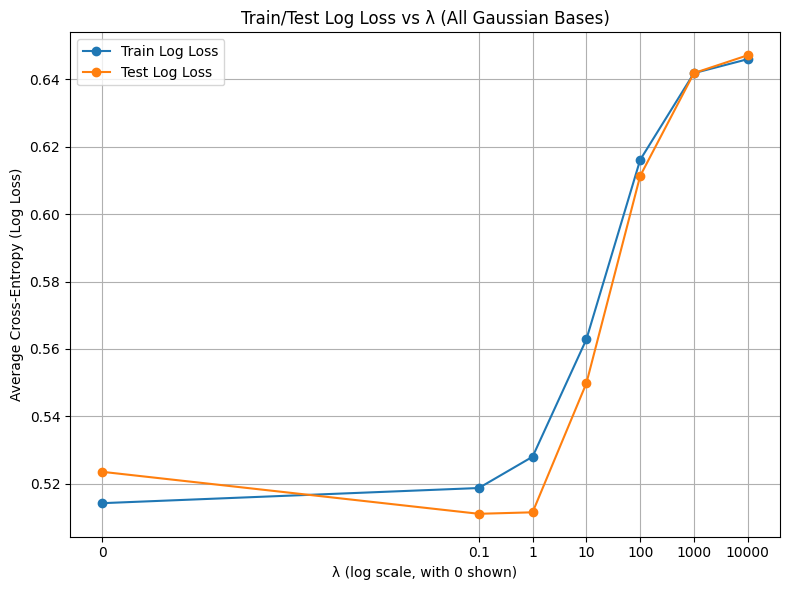

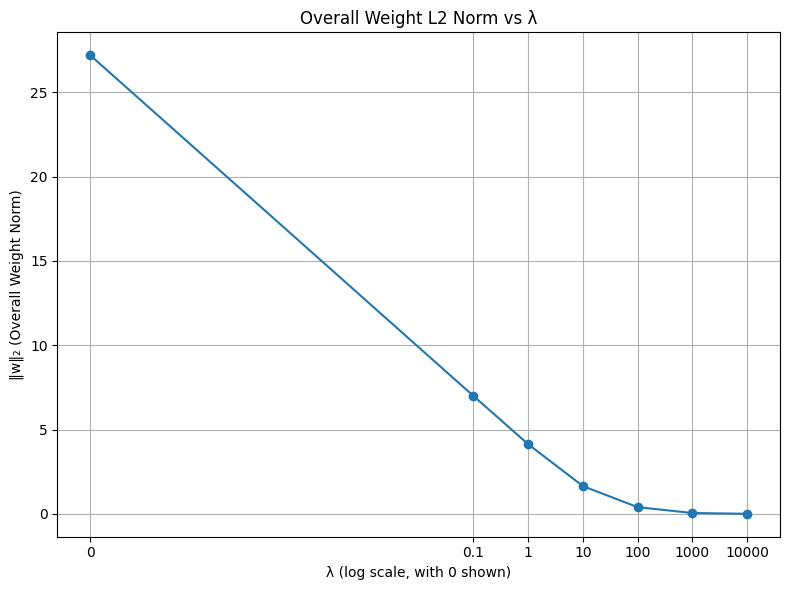

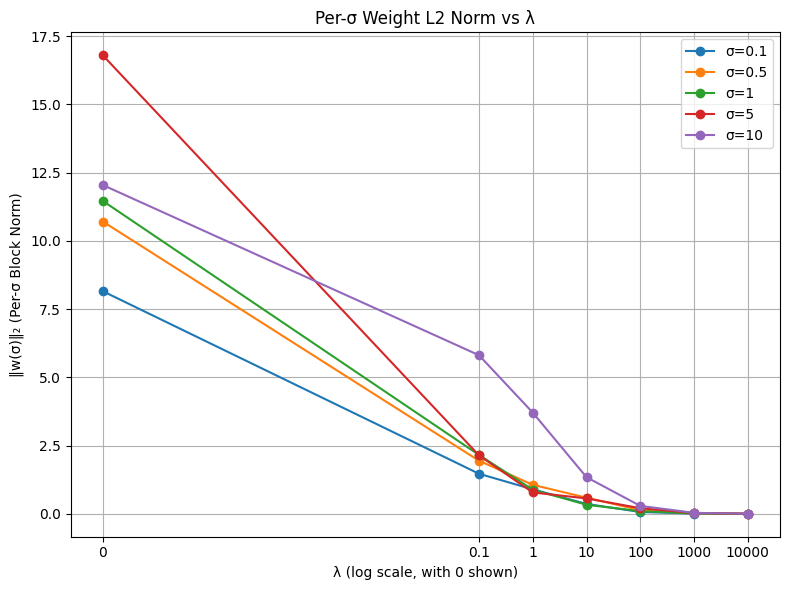


Summary (log loss and weight norm) across λ:

 lambda  train_log_loss  test_log_loss   w_norm
    0.0         0.51418        0.52349 27.19745
    0.1         0.51868        0.51102  6.99355
    1.0         0.52797        0.51146  4.13167
   10.0         0.56282        0.54979  1.64636
  100.0         0.61613        0.61135  0.39870
 1000.0         0.64189        0.64190  0.05267
10000.0         0.64603        0.64720  0.00554
Linear Regression MSE: 0.17104527280850101
Ridge Regression MSE: 0.1710033409616174
Lasso Regression MSE: 0.18432264831391634


In [13]:
# Example: Linear Regression using the California Housing Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)
# ===========================================
# ALL BASIS + REGULARIZED LOGISTIC REGRESSION
# Plots: (1) Train/Test Log Loss vs λ
#        (2) ||w||2 vs λ
#        (3) ||w_sigma||2 vs λ (5 lines)
# ===========================================

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# ---------- Load dataset (Colab upload OR local) ----------
data = None
try:
    from google.colab import files
    uploaded = files.upload()                      # choose CSV
    filename = list(uploaded.keys())[0]
    data = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"Loaded from uploaded file: {filename}")
except Exception:
    local_name = "diabetes_DT (1).csv"            # change if needed
    data = pd.read_csv(local_name)
    print(f"Loaded from local file: {local_name}")

print("Head of data:")
print(data.head(), "\n")

# ---------- Prepare X, y ----------
X = data.drop(columns=['Outcome'])
y = data['Outcome'].astype(int)

# ---------- Gaussian basis helpers ----------
def gaussian_basis(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2.0 * (sigma ** 2)))

means = np.linspace(-10, 10, 5)          # [-10, -5, 0, 5, 10]
sigmas = [0.1, 0.5, 1, 5, 10]            # all σ values to include
RANDOM_STATE = 42

# ---------- Build ONE big design matrix with ALL σ ----------
# name columns as: {feature}_sigma{σ}_mu{μ}
cols = []
blocks_by_sigma = {s: [] for s in sigmas}   # will store column names per σ

X_all = pd.DataFrame(index=X.index)
for s in sigmas:
    for col in X.columns:
        for m in means:
            cname = f"{col}_sigma{s}_mu{m}"
            X_all[cname] = gaussian_basis(X[col].astype(float), m, s)
            cols.append(cname)
            blocks_by_sigma[s].append(cname)

# (Optional) Explicit bias column (intercept is already handled by sklearn, so we skip it)
# X_all["bias"] = 1.0

# ---------- Train/test split (fixed once) ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

# ---------- Regularization grid ----------
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

# For plotting x-axis (log scale can't show 0) -> use tiny proxy and label as "0"
lambda_plot = [1e-8 if lam == 0 else lam for lam in lambdas]
lambda_tick_positions = [1e-8, 0.1, 1, 10, 100, 1000, 10000]
lambda_tick_labels    = ["0", "0.1", "1", "10", "100", "1000", "10000"]

# ---------- Storage ----------
train_log_losses = []
test_log_losses  = []
w_norms          = []              # ||w||2 overall
w_sigma_norms    = {s: [] for s in sigmas}  # ||w(σ)||2 per σ

# ---------- Run models ----------
for lam in lambdas:
    # λ=0 => effectively no regularization -> very large C
    C_val = 1e10 if lam == 0 else 1.0 / lam

    model = LogisticRegression(
        penalty='l2',
        C=C_val,
        solver='lbfgs',
        max_iter=10000
    )
    model.fit(X_train, y_train)

    # Probabilities for log loss
    p_train = model.predict_proba(X_train)[:, 1]
    p_test  = model.predict_proba(X_test)[:, 1]

    # Average cross-entropy (log loss)
    tr_loss = log_loss(y_train, p_train)
    te_loss = log_loss(y_test,  p_test)

    train_log_losses.append(tr_loss)
    test_log_losses.append(te_loss)

    # Weight norms
    w = model.coef_.ravel()  # intercept not included here
    w_norms.append(np.linalg.norm(w))

    # Per-σ block norms
    for s in sigmas:
        cols_s = blocks_by_sigma[s]
        idx_s = [X_train.columns.get_loc(c) for c in cols_s]
        w_s = w[idx_s]
        w_sigma_norms[s].append(np.linalg.norm(w_s))

# ---------- Plot 1: Train/Test Log Loss vs λ ----------
plt.figure(figsize=(8, 6))
plt.plot(lambda_plot, train_log_losses, marker='o', label='Train Log Loss')
plt.plot(lambda_plot, test_log_losses,  marker='o', label='Test Log Loss')
plt.xscale('log')
plt.xticks(lambda_tick_positions, lambda_tick_labels)
plt.xlabel('λ (log scale, with 0 shown)')
plt.ylabel('Average Cross-Entropy (Log Loss)')
plt.title('Train/Test Log Loss vs λ (All Gaussian Bases)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Plot 2: ||w||2 vs λ ----------
plt.figure(figsize=(8, 6))
plt.plot(lambda_plot, w_norms, marker='o')
plt.xscale('log')
plt.xticks(lambda_tick_positions, lambda_tick_labels)
plt.xlabel('λ (log scale, with 0 shown)')
plt.ylabel('‖w‖₂ (Overall Weight Norm)')
plt.title('Overall Weight L2 Norm vs λ')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Plot 3: ||w(σ)||2 per σ vs λ (5 lines) ----------
plt.figure(figsize=(8, 6))
for s in sigmas:
    plt.plot(lambda_plot, w_sigma_norms[s], marker='o', label=f'σ={s}')
plt.xscale('log')
plt.xticks(lambda_tick_positions, lambda_tick_labels)
plt.xlabel('λ (log scale, with 0 shown)')
plt.ylabel('‖w(σ)‖₂ (Per-σ Block Norm)')
plt.title('Per-σ Weight L2 Norm vs λ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Print numeric table ----------
results_df = pd.DataFrame({
    "lambda": lambdas,
    "train_log_loss": np.round(train_log_losses, 5),
    "test_log_loss":  np.round(test_log_losses, 5),
    "w_norm":         np.round(w_norms, 5)
})
print("\nSummary (log loss and weight norm) across λ:\n")
print(results_df.to_string(index=False))

# Preprocess: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge.predict(X_test)))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso.predict(X_test)))

Logistic Regression is applied to a classification problem.

L2 regularization prevents overfitting on high-dimensional data.

Training and test accuracy indicate how well the model generalizes.



In [ ]:
# Logistic Regression: Using the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# Standardize
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression with L2
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)
logreg.fit(X_train, y_train)

# Evaluate
train_acc = accuracy_score(y_train, logreg.predict(X_train))
test_acc = accuracy_score(y_test, logreg.predict(X_test))
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158
